In [41]:
library(data.table)
library(tidyverse)
library(ggrepel)
library(ggpubr)
library(pheatmap)
library(cowplot)
library(paletteer)
library(grid)
library(gtable)
source("utils.R")

### Fig5b

In [3]:
load("~/HSPC_zenedo/Fig5/Fig5b.RData")

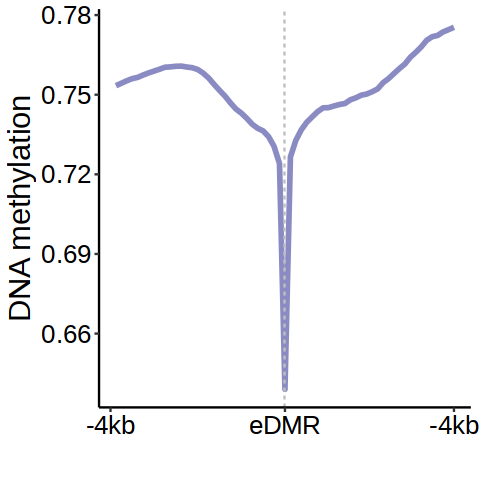

In [24]:
## DNA methylation
options(repr.plot.width=4, repr.plot.height=4)
ggplot(eDMR_flanking[which(eDMR_flanking$type == "met"), ], aes(x=label, y=value, group=type)) + 
    geom_line(color="#8A8BC3", size=1.2) + 
    theme_classic() +
    theme(axis.text = element_text(size=15, color="black"), axis.title = element_text(size=18, color = "black")) +
    geom_vline(xintercept = 32, lty=2, color="grey") +
    scale_x_continuous(breaks = c(0, 32, 63), labels = c("-4kb", "eDMR", "-4kb")) +
    xlab("") + ylab("DNA methylation")

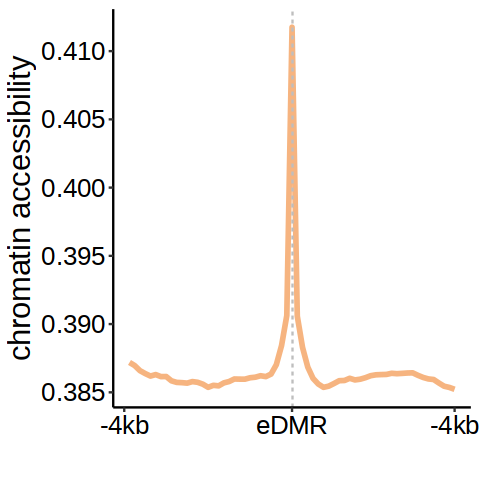

In [25]:
## chromatin accessibility
options(repr.plot.width=4, repr.plot.height=4)
ggplot(eDMR_flanking[which(eDMR_flanking$type == "acc"), ], aes(x=label, y=value, group=type)) + 
    geom_line(color="#F6B480", size=1.2) + 
    theme_classic() +
    theme(axis.text = element_text(size=15, color="black"), axis.title = element_text(size=18, color = "black")) +
    geom_vline(xintercept = 32, lty=2, color="grey") +
    scale_x_continuous(breaks = c(0, 32, 63), labels = c("-4kb", "eDMR", "-4kb")) +
    xlab("") + ylab("chromatin accessibility")

### Fig5c

In [26]:
load("~/HSPC_zenedo/Fig5/Fig5c.RData")

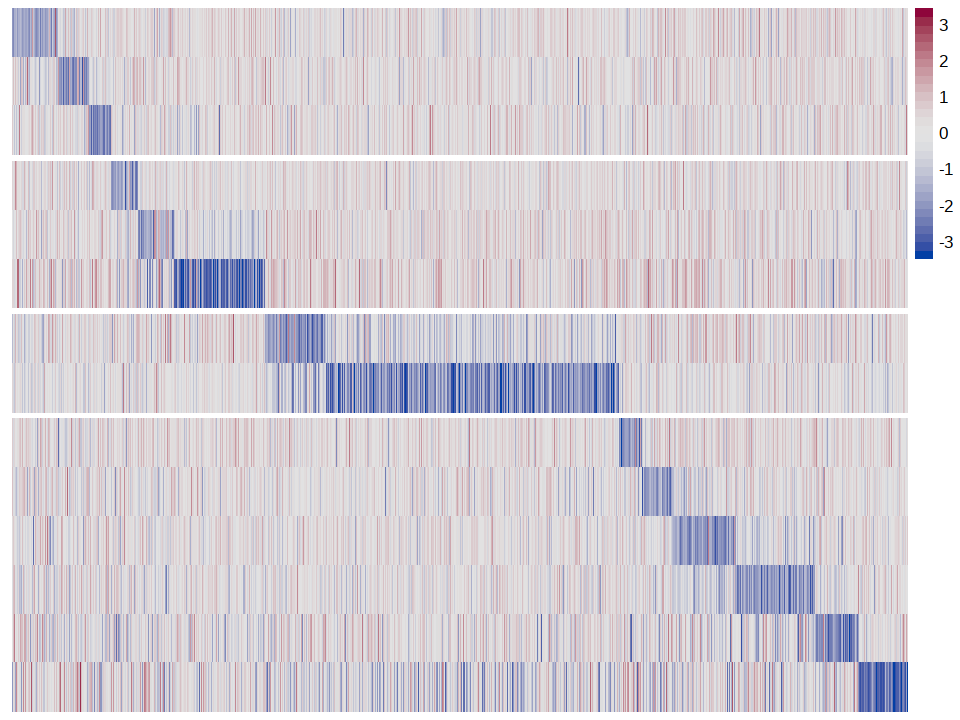

In [52]:
p <- pheatmap(t(pheat), show_rownames = F, show_colnames = F, 
         scale = "column", cluster_rows = F, cluster_cols = F, 
         color = paletteer_c("grDevices::Blue-Red", 30), 
         gaps_row = c(3, 6, 8))
p2 <- ggplot(num, aes(x=Var1, y=Freq / 1000, fill=Var1))+ 
  geom_bar(stat = "identity", width=0.7) +
  coord_flip() +
  theme_classic() + 
  scale_fill_manual(values = col) +
  theme(legend.position = "none") + 
  ylab("Number of eDMRs(x10^3)") + xlab("")

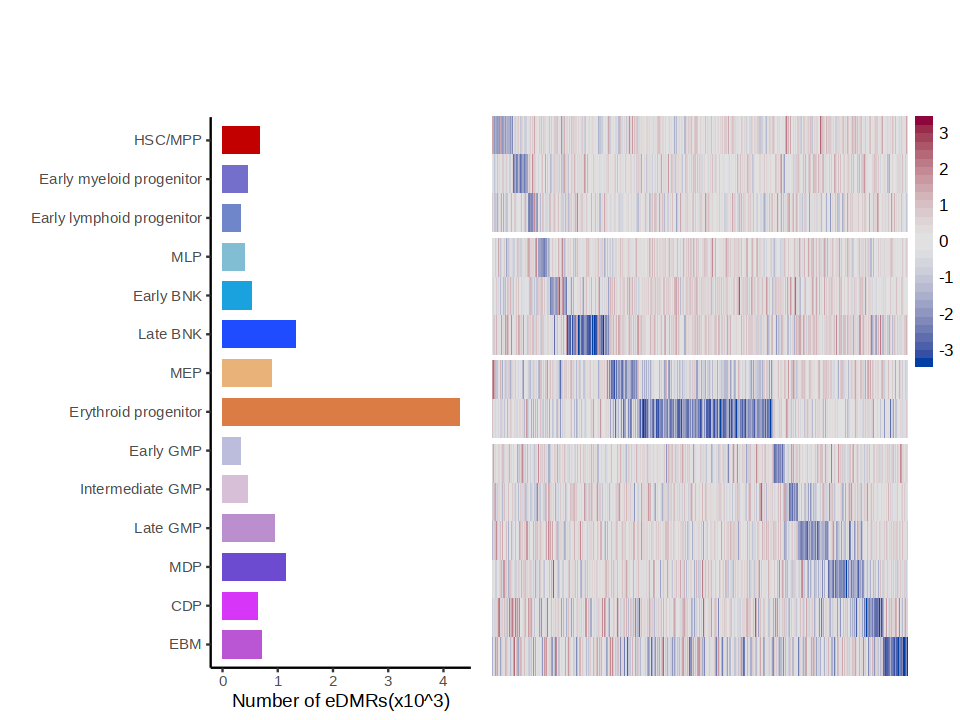

In [53]:
options(repr.plot.width=8, repr.plot.height=6)
ggdraw() + 
    draw_plot(p2, x = .0, y = .0, width = .5, height = .85) +
    draw_plot(p$gtable, x = .5, y = .05, width = .5, height = .8) 